In [1]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn


# 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 12 # fontsize of the x tick labels
plt.rcParams['ytick.labelsize'] = 12 # fontsize of the y tick labels

# Sklearn imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
#Scipy imports
from scipy import stats

#import itertools
import itertools

# 2. Read dataset

In [3]:
data = pd.read_csv('HW1_Data.csv')
data.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


# Dataset shape

In [4]:
print(f"The shape of the data is: ",data.shape)

The shape of the data is:  (31891, 12)


# 3. EDA

### Plotting correlation in heatmap

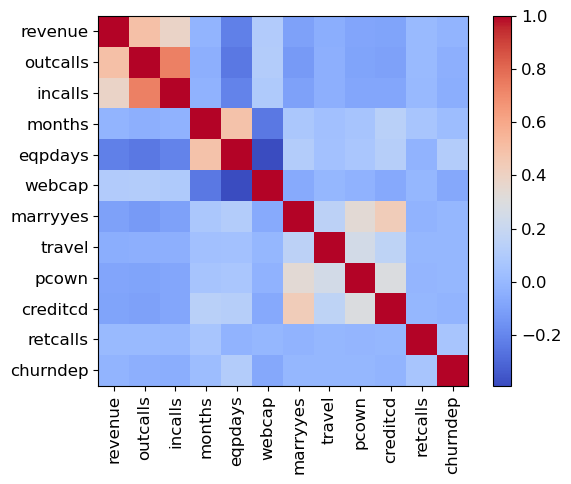

In [5]:
# Create a heatmap
plt.imshow(data.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(data.corr().columns)), data.corr().columns, rotation=90)
plt.yticks(range(len(data.corr().columns)), data.corr().columns)
plt.show()

In [6]:
# # Create a heatmap
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()

### checking min and max values for each feature

In [7]:
min_values = data.min()
max_values = data.max()

# create df to visualize min and max for every feature
stats_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values
})

stats_df

,Min,Max
revenue,-5.86,861.11
outcalls,0.00,610.33
incalls,0.00,404.00
months,6.00,60.00
eqpdays,-5.00,1812.00
webcap,0.00,1.00
marryyes,0.00,1.00
travel,0.00,1.00
pcown,0.00,1.00
creditcd,0.00,1.00


In [8]:
# Count how many neg values are in revenues and eqpdays
data[(data['revenue'] < 0) ].shape, data[(data['eqpdays'] < 0) ].shape

((1, 12), (46, 12))

In [9]:
data[(data['eqpdays'] < 0) ]

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
102,95.49,13.67,3.00,16,-2,1,0,0,0,0,2,1
2190,58.43,62.00,6.67,9,-1,1,1,0,0,1,1,1
2207,69.67,2.00,0.33,12,-3,1,0,0,0,1,1,1
2982,68.98,0.00,0.00,20,-2,1,1,0,0,1,1,1
3359,74.98,0.00,0.00,24,-1,1,1,0,0,1,1,1
13781,83.66,30.67,4.67,11,-1,1,0,0,0,0,0,1
13926,173.28,29.00,7.00,21,-2,1,0,0,0,0,0,1
14019,90.26,201.67,57.33,17,-2,0,0,0,0,0,0,1
14145,105.45,51.33,9.33,24,-1,0,0,0,0,1,0,1
14348,58.62,0.00,0.00,15,-1,1,0,0,0,0,0,1


### checking outlier in df

### Replace negative values in revenue and eqpdays with zero as min value

In [11]:
data['revenue'] = data['revenue'].apply(lambda x: max(0,x))
data['eqpdays'] = data['eqpdays'].apply(lambda x: max(0,x))

In [12]:
# Check again to see if neg values were replaced by zero
data[(data['revenue'] < 0) ].shape, data[(data['eqpdays'] < 0) ].shape

((0, 12), (0, 12))

### Check class imbalance

Text(0, 0.5, 'proportion of observations')

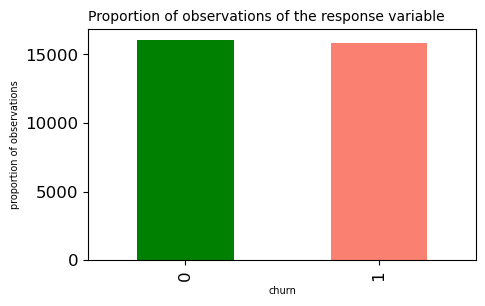

In [13]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
data['churndep'].value_counts().plot(kind='bar',
                                     ax=ax,
                                     color=['green','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=10, loc='left')
ax.set_xlabel('churn',
              fontsize=7)
ax.set_ylabel('proportion of observations',
              fontsize=7)

# 4. Split the data

In [14]:
X = data.drop(columns=['churndep'],axis=1)
y = data.churndep
X.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3


In [15]:
# Checking missing values in dataset
X.isna().sum()

revenue     0
outcalls    0
incalls     0
months      0
eqpdays     0
webcap      0
marryyes    0
travel      0
pcown       0
creditcd    0
retcalls    0
dtype: int64

### Splitting data ( Train and Test sets)

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [17]:
class_names = {0: 'Not Churned', 1: 'Churned'}

# 5. Creating Decision tree instance | Fiitng the model and Predicting

In [18]:
clf = DecisionTreeClassifier(criterion='entropy') # Decision tree classifier instance using entropy and with no max depth specified

# Fit the data
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

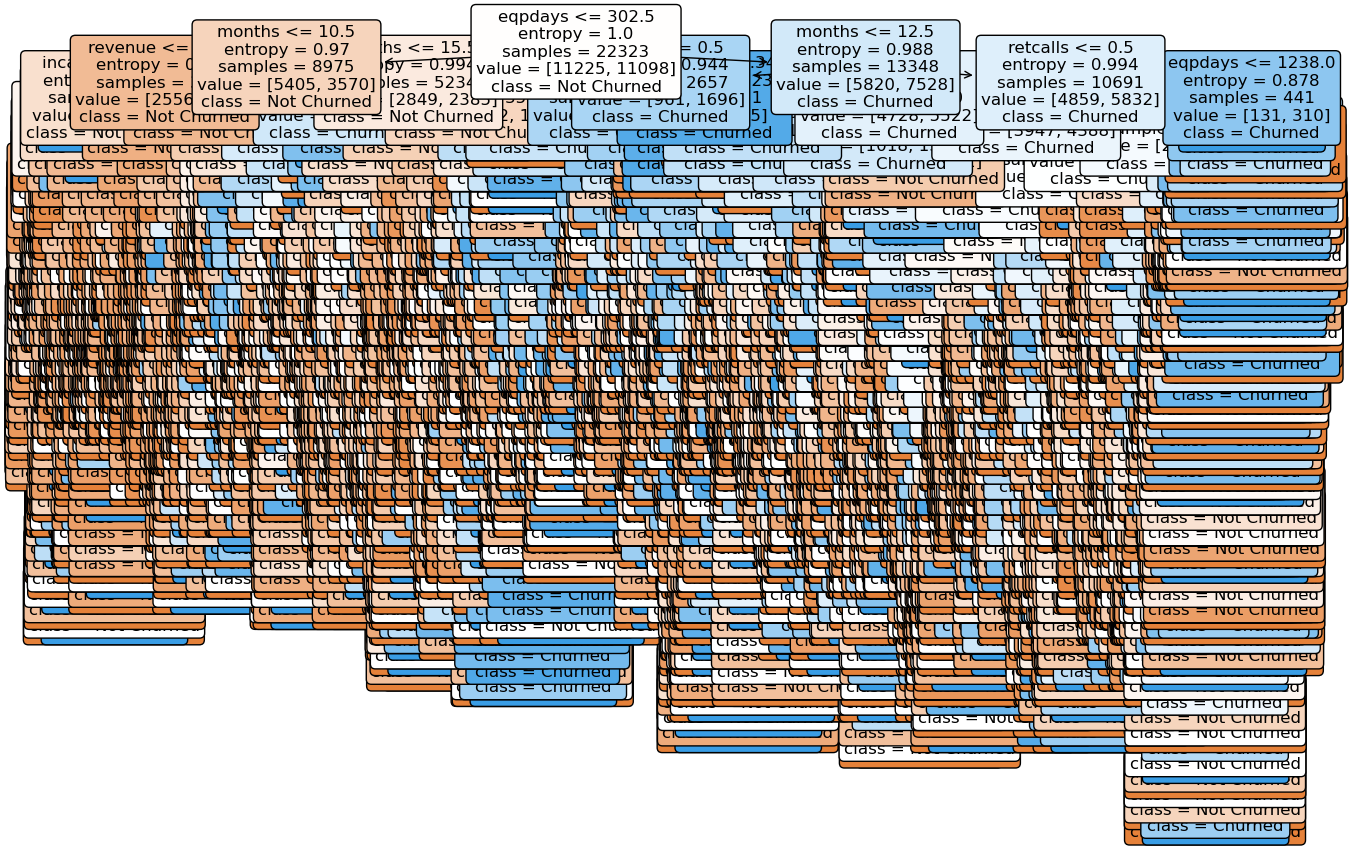

In [19]:
# Plot the tree
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(X_train,y_train),
               feature_names=X.columns,
               filled=True,
               class_names=class_names,
               rounded=True,
               fontsize=12)
plt.show()

# 6. Evaluating model performance, visualizing confusion matrix

In [20]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy:  0.529891304347826
F1 Score: 0.5313607001458637
Precision: 0.5267506713488949
Recall: 0.5360521336977087


In [21]:
print(f"\t\t The classification report  \n\n {classification_report(y_test, y_pred)}")

		 The classification report  

               precision    recall  f1-score   support

           0       0.53      0.52      0.53      4811
           1       0.53      0.54      0.53      4757

    accuracy                           0.53      9568
   macro avg       0.53      0.53      0.53      9568
weighted avg       0.53      0.53      0.53      9568



### The below function was adopted from class code

Confusion matrix, without normalization
[[2520 2291]
 [2207 2550]]


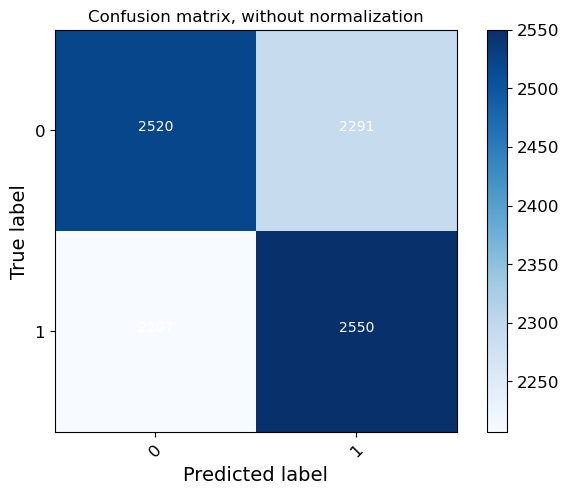

In [22]:
# Function that prints and plots the confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         # shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       # add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          # choose format depending on whether the confusion matrix is normalizaed or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification
cnf_matrix = confusion_matrix(y_test, y_pred)
#Determine the way floating point numbers are displayed
np.set_printoptions(precision=2)                              # number of digits of precision for floating point output

# Defining classes names

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      title='Confusion matrix, without normalization')



plt.show()

# 7. Hyper parameter tuning 

In [23]:
# define parameters dict and iterate thru all parameters while keeping the best ones

# I have refrenced to scikit-learn to define some of the below paramaters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,20),
    'min_samples_leaf': range(1,20),
    
}

best_params = {} # a dict to help us keep best parameters
best_accuracy = 0.0 # Initialize this to 0 and we keep update once we get new best accuracy 
cnf_matrix_tuned = []
report = None

# Iterate thru all possible combination of params

for criterion in params['criterion']:
    for max_depth in params['max_depth']:
        for min_samples_leaf in params['min_samples_leaf']:
                # Initialize Decision tree with different parameters
            clf = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_leaf= min_samples_leaf
            )

            clf.fit(X_train,y_train)

            #Make predictions 
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            #update best_accuracy variable if current accuracy is greater than best_accuracy
            if accuracy > best_accuracy: 
                best_accuracy = accuracy

                # Also add best parameters associated with best accuracy
                best_params = {
                    'criterion': criterion,
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf
                }
                cnf_matrix_tuned = confusion_matrix(y_test,y_pred)
                report = classification_report(y_test, y_pred)

print(f"Best accuracy is: {best_accuracy}")
print(f"Best parameters : {best_params}")

Best accuracy is: 0.6047240802675585
Best parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}


Confusion matrix, without normalization
[[2151 2660]
 [1122 3635]]


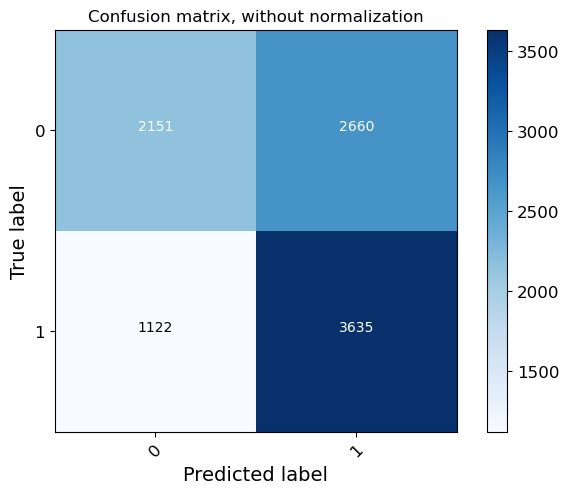

In [24]:
# plot confustion matrix for best params model 
plt.figure()
plot_confusion_matrix(cnf_matrix_tuned,
                      classes=class_names,
                      title='Confusion matrix, without normalization')



plt.show()

In [25]:
# Print classification report
print(f"\t\t The classification report  \n\n {report}")

		 The classification report  

               precision    recall  f1-score   support

           0       0.66      0.45      0.53      4811
           1       0.58      0.76      0.66      4757

    accuracy                           0.60      9568
   macro avg       0.62      0.61      0.59      9568
weighted avg       0.62      0.60      0.59      9568



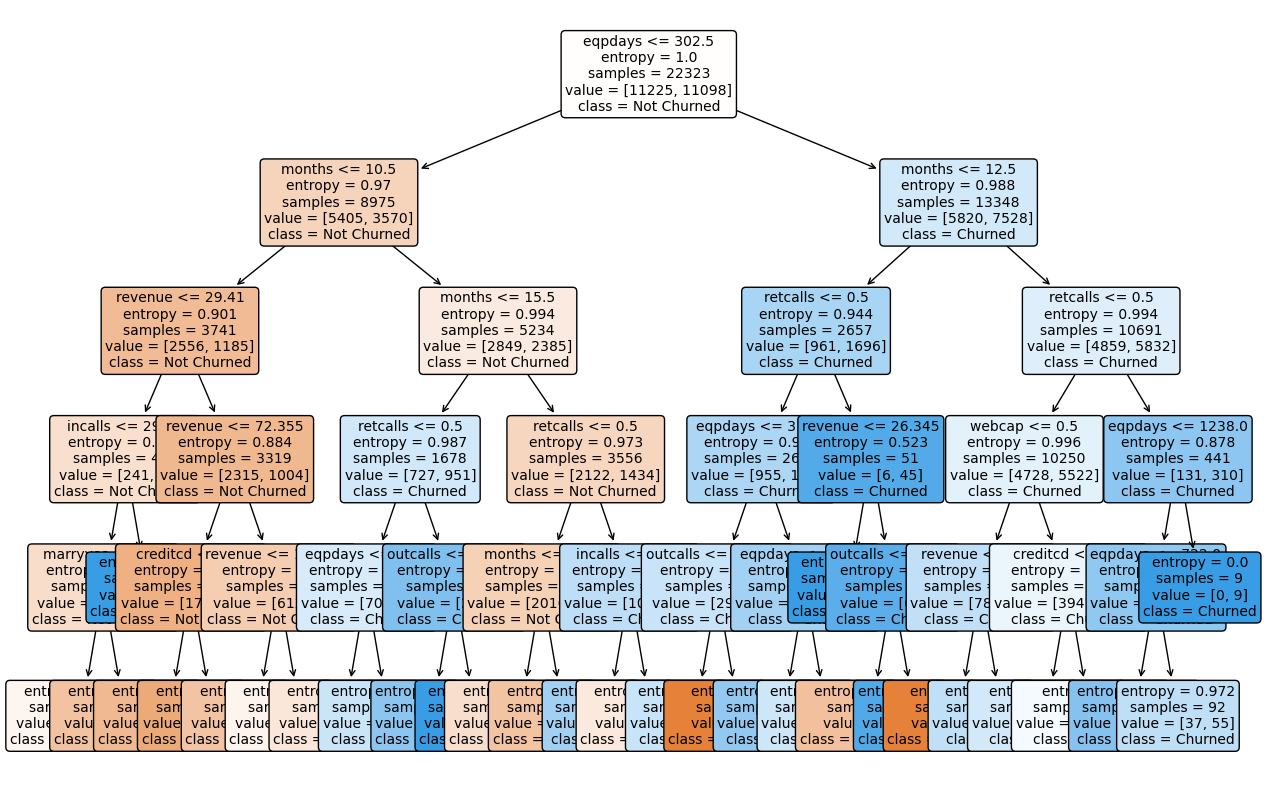

In [26]:
# The below function was adopted from class code
# Plot the tree
plt.figure(figsize=(15,10))

best_clf = DecisionTreeClassifier(**best_params)
tree.plot_tree(best_clf.fit(X_train,y_train),
               feature_names=X.columns,
               filled=True,
               class_names=class_names,
               rounded=True,
               fontsize=10)
plt.show()